### DEMOPT05
# Optimization with qnewton

In [1]:
from compecon import OP
import numpy as np
from demos import demo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

np.set_printoptions(precision=4,suppress=True)
plt.style.use('seaborn')
%matplotlib inline

## Example 1
Find the optimal value of 
$$f(x) = x^3 - 12x^2 + 36x + 8$$

In [2]:
def f(x):
    return x ** 3 - 12 * x ** 2 + 36 * x + 8

F = OP(f)

x = F.qnewton(x0=4.0)
J = F.jacobian(x)
E = np.linalg.eig(F.hessian(x))[0]

print('x = ', x, '\nJ = ', J, '\nE = ', E)

x =  [2.] 
J =  [-0.] 
E =  [-12.]


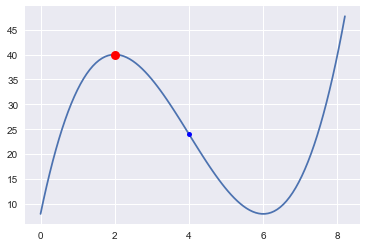

In [3]:
figs = []
figs.append(demo.figure('','',''))
xx = np.linspace(0,8.2,100)
plt.plot(xx,f(xx))
demo.bullet(4,f(4),'b.',10)
demo.bullet(x,f(x),'r.',18)

## Find the optimum for 
$$g(x,y) = 5 - 4x^2 - 2y^2 - 4xy - 2y$$

In [4]:
def g(z):
    x, y = z
    return 5 - 4*x**2 - 2*y**2 - 4*x*y - 2*y
    
G = OP(g, print=True)
x = G.qnewton(x0=[-1, 1])
J = G.jacobian(x)
E = np.linalg.eig(G.hessian(x))[0]
print('x = ', x, '\nJ = ', J, '\nE = ', E)

   0     0  1.12e+00
   1     0  1.58e+00
   2     0  1.22e-11
x =  [ 0.5 -1. ] 
J =  [0. 0.] 
E =  [-10.4721  -1.5279]


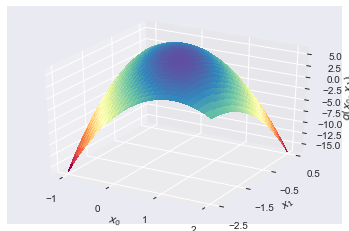

In [5]:
xx0 = np.linspace(-1.0,2.0,25)
xx1 = np.linspace(-2.5,0.5,25)
x0, x1 = np.meshgrid(xx0,xx1)

figs.append(plt.figure())
ax = figs[-1].add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x0, x1, g([x0, x1]), rstride=1, cstride=1, 
                cmap=cm.Spectral, linewidth=0, antialiased=False)
ax.set_xlabel('$x_0$')
ax.set_xticks(np.linspace(-1.0,2.0,4))
ax.set_ylabel('$x_1$')
ax.set_yticks(np.linspace(-2.5,0.5,4))
ax.set_zlabel('$g(x_0,x_1)$')
plt.show()